In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import collections
import altair as alt
import seaborn as sns
import ast
from tqdm import tqdm
from Bio.Seq import Seq
import more_itertools as mit

In [2]:
allCaller = pd.read_csv('/home/mark/Desktop/MEI_Group/HGSVC3/Merged_Callsets/Manuscript/GRCh38_hgsvc3_PublicationSet_Final.csv')
allCaller.set_index("ID", inplace=True)

In [4]:
print(len(allCaller))

13001


In [3]:
collections.Counter(allCaller[allCaller['Caller_Count']==2]['TE_Designation'])

Counter({'SINE/Alu': 9932, 'LINE/L1': 1404, 'Retroposon/SVA': 605})

In [6]:
11941/13001

0.9184678101684486

In [4]:
hg38_pDEL_DF = pd.read_csv('/home/mark/Desktop/MEI_Group/HGSVC3/hg38_hgsvc3_deletions_07-11-2024.csv').set_index("ID")

In [5]:
hg38_pDEL_DF

,CHROM,POS,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00096,HG00171,...,Ancestral_Findings,Tail_Begins,Tail_Type,Element_Annotation,Element_Divergence,Tail_Length,Tail_Seed_Hits,Unique_Element_Count,FILTER_RESULTS,Young_Filter
ID,,,,,,,,,,,,,,,,,,,,,
chr1-669036-DEL-77,chr1,669035,ATACATGGAGGGGAACAACACACACCAGGGCCTCTCAGGGGGACGG...,A,.,.,ID=chr1-669036-DEL-77;VARTYPE=SV;SVTYPE=DEL;SV...,GT,.|0|.,0|.|.,...,No_Hits,No_Tail_Detected,No_Tail_Type,L1P4,16.9,0,0,One_Element,NONE,['Good_LINE_Size']
chr1-1679557-DEL-306,chr1,1679556,GTGGCTCACACCTGGAATCCCAGCACTTTGGGAGGCCAAGGTGGGC...,G,.,.,ID=chr1-1679557-DEL-306;VARTYPE=SV;SVTYPE=DEL;...,GT,0|0|.,0|0|.,...,No_Hits,12,Possible_A-Tail,AluSx1,9.9,20,22,One_Element,NONE,['Good_ALU_Size']
chr1-4155351-DEL-140,chr1,4155350,AGATTACAGGTGTGAGCCACTGGGCCTGCCCACATTTTAAAAAAAT...,A,.,.,ID=chr1-4155351-DEL-140;VARTYPE=SV;SVTYPE=DEL;...,GT,0|0|.,0|0|.,...,No_Hits,96,Possible_A-Tail,AluJr4,18.6,7,3,One_Element,['Bad_Tail_Position'],['Good_ALU_Size']
chr1-6304649-DEL-1453,chr1,6304648,CGCCCTTAATCCATTTAACCCTGAGTGGACACAGCACATGTTTCAG...,C,.,.,ID=chr1-6304649-DEL-1453;VARTYPE=SV;SVTYPE=DEL...,GT,0|0|.,0|0|.,...,No_Hits,70,Possible_A-Tail*_and_Possible_T-Tail,SVA_D,4.6,7,3,One_Element,['Bad_Tail_Position'],"['LOWER_SVA_DIVERGENCE', 'Good_SVA_Size']"
chr1-6305130-DEL-176,chr1,6305129,TCTTCCCAGTAGGGGCGGCCGGGCAGAGGCGCCCCTCACCTCCCGG...,T,.,.,ID=chr1-6305130-DEL-176;VARTYPE=SV;SVTYPE=DEL;...,GT,0|0|.,0|0|.,...,No_Hits,No_Tail_Detected,No_Tail_Type,SVA_F,5.3,0,0,One_Element,NONE,"['LOWER_SVA_DIVERGENCE', 'Good_SVA_Size']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY-7149957-DEL-102,chrY,7149956,ACTACAGGTGCCTGCTACCATGCCCAGCTAATTTTTTTTTTTTTTT...,A,.,.,ID=chrY-7149957-DEL-102;VARTYPE=SV;SVTYPE=DEL;...,GT,0|.|.,.|.|.,...,No_Hits,31,Possible_T-Tail,AluSx1,12.6,24,20,One_Element,['Alu_Linker_Region_Warning'],['Good_ALU_Size']
chrY-11425322-DEL-50,chrY,11425321,AGGAAATAAAAGAGGATACAAACAAATGGAAGAACATTCCATGCTC...,A,.,.,ID=chrY-11425322-DEL-50;VARTYPE=SV;SVTYPE=DEL;...,GT,0|.|.,.|.|.,...,No_Hits,No_Tail_Detected,No_Tail_Type,L1P1,2.0,0,0,One_Element,NONE,"['LOWER_LINE_DIVERGENCE', 'Good_LINE_Size']"
chrY-15153652-DEL-58,chrY,15153651,CTGTTGTTTCCTGACGTTTTAATGATTGCCATTCTAACTGGTGTGA...,C,.,.,ID=chrY-15153652-DEL-58;VARTYPE=SV;SVTYPE=DEL;...,GT,0|.|.,.|.|.,...,No_Hits,No_Tail_Detected,No_Tail_Type,L1P1,1.7,0,0,One_Element,NONE,"['LOWER_LINE_DIVERGENCE', 'Good_LINE_Size']"


In [6]:
sampleOrder=['HG02587',
             'HG02666',
             'HG02769',
             'HG02818',
             'HG02953',
             'HG03065',
             'HG03248',
             'HG03371',
             'HG03452',
             'HG03456',
             'HG03520',
             'NA19036',
             'NA19129',
             'NA19238',
             'NA19239',
             'NA19240',
             'NA19317',
             'NA19331',
             'NA19347',
             'NA19384',
             'NA19434',
             'NA21487',
             'HG01890',
             'HG02011',
             'HG02282',
             'HG02554',
             'NA19705',
             'NA19836',
             'NA19983',
             'NA20355',
             'HG00731',
             'HG00732',
             'HG00733',
             'HG01114',
             'HG01352',
             'HG01457',
             'HG01573',
             'HG02106',
             'NA19650',
             'HG00512',
             'HG00513',
             'HG00514',
             'HG00864',
             'HG01596',
             'HG02018',
             'HG02059',
             'NA18534',
             'NA18939',
             'NA18989',
             'HG00096',
             'HG00171',
             'HG00268',
             'HG00358',
             'HG01505',
             'NA12329',
             'NA20509',
             'NA24385',
             'HG02492',
             'HG03009',
             'HG03683',
             'HG03732',
             'HG03807',
             'HG04036',
             'HG04217',
             'NA20847' 
            ]
sampleList={x:{'SINE/Alu':0,'LINE/L1':0, 'Retroposon/SVA':0, 'HERVK':0, 'snRNA':0, 'REF_SINE/Alu':0,'REF_LINE/L1':0, 'REF_Retroposon/SVA':0, 'REF_HERVK':0, 'REF_snRNA':0, 'DEL_SINE/Alu':0,'DEL_LINE/L1':0, 'DEL_Retroposon/SVA':0, 'DEL_HERVK':0, 'DEL_snRNA':0,} for x in sampleOrder}

In [7]:
hg38RefINS = pd.read_csv('/home/mark/Desktop/MEI_Group/HGSVC3/DELETIONS_HGSVC3/hg38_REF_INS_05-31-2024.csv').set_index("ID")

In [8]:
sampleList

{'HG02587': {'SINE/Alu': 0,
  'LINE/L1': 0,
  'Retroposon/SVA': 0,
  'HERVK': 0,
  'snRNA': 0,
  'REF_SINE/Alu': 0,
  'REF_LINE/L1': 0,
  'REF_Retroposon/SVA': 0,
  'REF_HERVK': 0,
  'REF_snRNA': 0,
  'DEL_SINE/Alu': 0,
  'DEL_LINE/L1': 0,
  'DEL_Retroposon/SVA': 0,
  'DEL_HERVK': 0,
  'DEL_snRNA': 0},
 'HG02666': {'SINE/Alu': 0,
  'LINE/L1': 0,
  'Retroposon/SVA': 0,
  'HERVK': 0,
  'snRNA': 0,
  'REF_SINE/Alu': 0,
  'REF_LINE/L1': 0,
  'REF_Retroposon/SVA': 0,
  'REF_HERVK': 0,
  'REF_snRNA': 0,
  'DEL_SINE/Alu': 0,
  'DEL_LINE/L1': 0,
  'DEL_Retroposon/SVA': 0,
  'DEL_HERVK': 0,
  'DEL_snRNA': 0},
 'HG02769': {'SINE/Alu': 0,
  'LINE/L1': 0,
  'Retroposon/SVA': 0,
  'HERVK': 0,
  'snRNA': 0,
  'REF_SINE/Alu': 0,
  'REF_LINE/L1': 0,
  'REF_Retroposon/SVA': 0,
  'REF_HERVK': 0,
  'REF_snRNA': 0,
  'DEL_SINE/Alu': 0,
  'DEL_LINE/L1': 0,
  'DEL_Retroposon/SVA': 0,
  'DEL_HERVK': 0,
  'DEL_snRNA': 0},
 'HG02818': {'SINE/Alu': 0,
  'LINE/L1': 0,
  'Retroposon/SVA': 0,
  'HERVK': 0,
  'snRN

In [9]:
for row in allCaller.index:
    elementType=str(allCaller.at[row,'TE_Designation'])
    for sample in sampleOrder:
        #total = len([x for x in allCaller.at[row,sample].split("|")[:2] if str(x) == '1'])
        if '1' in str(allCaller.at[row,sample]):
            total=1
            sampleList[sample][elementType]+=total
        else:
            continue

In [10]:
for row in hg38RefINS.index:
    elementType=str(hg38RefINS.at[row,'TE_Designation'])
    for sample in sampleOrder:
        #total = len([x for x in hg38RefINS.at[row,sample].split("|")[:2] if str(x) == '0'])
        if '1' in str(hg38RefINS.at[row,sample]):
            total=1
            sampleList[sample]["REF_"+str(elementType)]+=total
        else:
            continue

In [11]:
for row in hg38_pDEL_DF.index:
    elementType=str(hg38_pDEL_DF.at[row,'TE_Designation'])
    for sample in sampleOrder:
        #total = len([x for x in hg38_pDEL_DF.at[row,sample].split("|")[:2] if str(x) == '1'])
        if '1' in str(hg38_pDEL_DF.at[row,sample]):
            total=1
            sampleList[sample]["DEL_"+str(elementType)]+=total
        else:
            continue

In [12]:
columns=['SINE/Alu','LINE/L1','Retroposon/SVA','REF_SINE/Alu','REF_LINE/L1','REF_Retroposon/SVA', 'DEL_SINE/Alu','DEL_LINE/L1','DEL_Retroposon/SVA']
sampleDF = pd.DataFrame(index=sampleOrder, columns=['SINE/Alu','LINE/L1','Retroposon/SVA','REF_SINE/Alu','REF_LINE/L1','REF_Retroposon/SVA','DEL_SINE/Alu','DEL_LINE/L1','DEL_Retroposon/SVA'])
sampleList2 = []
for sample in sampleList.keys():
    for element in sampleList[sample]:
        sampleDF.at[sample, element] = int(sampleList[sample][element])
        sampleList2.append([sample, element,int(sampleList[sample][element])])
sampleDF2 =pd.DataFrame(data=sampleList2, columns=['Sample','Data-Element','Count'])

In [13]:
columns=['SINE/Alu','LINE/L1','Retroposon/SVA','REF_SINE/Alu','REF_LINE/L1','REF_Retroposon/SVA']
sampleDF = pd.DataFrame(index=sampleOrder, columns=['SINE/Alu','LINE/L1','Retroposon/SVA','REF_SINE/Alu','REF_LINE/L1','REF_Retroposon/SVA'])
sampleList2 = []
for sample in sampleList.keys():
    for element in sampleList[sample]:
        sampleDF.at[sample, element] = int(sampleList[sample][element])
        sampleList2.append([sample, element,int(sampleList[sample][element])])
sampleDF2 =pd.DataFrame(data=sampleList2, columns=['Sample','Data-Element','Count'])

In [14]:
samplePivot = sampleDF2.pivot(index="Sample", columns="Data-Element", values="Count").copy()

In [15]:
PopColors={'AFR':'orange', 'AMR':'red', 'EAS':'limegreen', 'EUR':'cyan', 'SAS':'pink'}
metaDataDF = pd.read_csv('/home/mark/Desktop/HLA/Globus/hgsvc_samples.tsv', sep='\t').set_index("sample")
populationColors={'ACB':'#FF9900',
 'ASW':'#FF6600',
 'ASK':'#1374DA',
 'BEB':'#8A008A',
 'CDX':'#339900',
 'CEU':'#0000FF',
 'CHB':'#ACCD00',
 'CHS':'#00FF00',
 'CLM':'#CC3333',
 'ESN':'#FFCD00',
 'FIN':'#00C5CD',
 'GBR':'#00EBFF',
 'GIH':'#9300D2',
 'GWD':'#FFB800',
 'IBS':'#6394EC',
 'ITU':'#AF2F5F',
 'JPT':'#008A00',
 'KHV':'#00CC33',
 'LWK':'#CC9933',
 'MKK':'#EEB718',
 'MSL':'#E0B818',
 'MXL':'#E00033',
 'PEL':'#FF0000',
 'PJL':'#E01288',
 'PUR':'#CC3300',
 'STU':'#FF00FF',
 'TSI':'#00008A',
 'YRI':'#FFB833'}

In [16]:
metaDataDF

,order_num,hgsvc_phase,family,member,population,supergroup,sex
sample,,,,,,,
NA19238,1,Yr1,Y117,Mother,YRI,AFR,Female
NA19239,2,Yr1,Y117,Father,YRI,AFR,Male
NA19240,3,Yr1,Y117,Daughter,YRI,AFR,Female
HG00731,4,Yr1,PR05,Father,PUR,AMR,Male
HG00732,5,Yr1,PR05,Mother,PUR,AMR,Female
...,...,...,...,...,...,...,...
NA19384,65,Yr2,NA19384,-,LWK,AFR,Male
HG01890,66,Yr3,BB05,Father,ACB,AFR,Male
NA19705,67,Yr3,2368,Son,ASW,AFR,Male


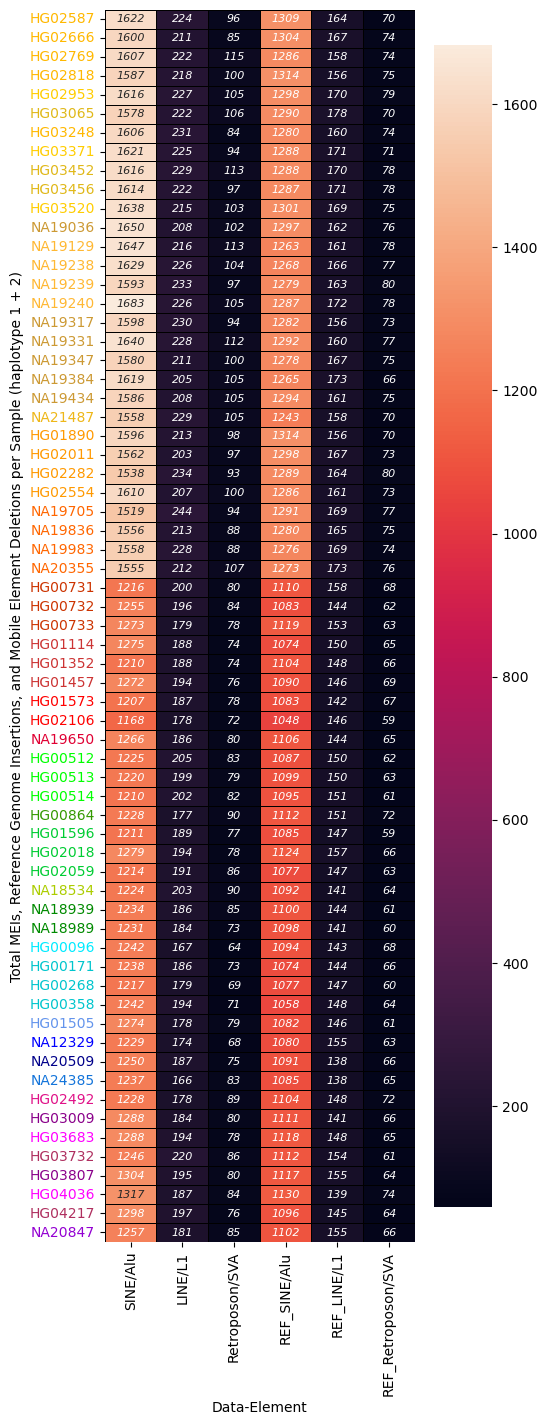

In [18]:
import matplotlib.pyplot as plt
colors = []
for x in sampleOrder:
    colors.append(populationColors[metaDataDF.at[x,'population']])

fig, ax = plt.subplots(figsize=(5,16))  
ax=sns.heatmap(samplePivot[columns].loc[sampleOrder], annot=True, linewidth=.5, fmt='g', linecolor='black',annot_kws={'fontsize': 8, 'fontstyle': 'italic'})
for ticklabel, tickcolor in zip(ax.get_yticklabels(), colors):
    ticklabel.set_color(tickcolor)
ax.set(ylabel='Total MEIs, Reference Genome Insertions, and Mobile Element Deletions per Sample (haplotype 1 + 2)')
#plt.savefig('/home/mark/Desktop/MEI_Group/HGSVC3/Figures/MEIs/hg38_MEI_INS_Overall.pdf', dpi=500, bbox_inches='tight')
plt.savefig('/home/mark/Desktop/MEI_Group/HGSVC3/Figures/MEIs/hg38_MEI_INS_Overall.svg', dpi=500, bbox_inches='tight')
#plt.savefig('/home/mark/Desktop/MEI_Group/HGSVC3/Figures/MEIs/hg38_MEI_INS_Overall.jpg', dpi=500, bbox_inches='tight')